#### 조건부 엔트로피

 - 결합 엔트로피  
     - 결합 확률 분포를 사용하여 정의한 엔트로피
     
     - $H[X,Y] = -\sum^{K_X}_{i=1}\sum^{K_Y}_{j=1}p(x_i,y_j)log_2p(x_i,y_j)$
     - $H[X,Y] = -\int_x\int_yp(x,y)log_2p(x,y)dxdy$
     
 ----
 
 - 조건부 엔트로피
 
     - X가 특정한 값 $x_i$를 가질 때의 Y의 엔트로피 $H[Y|X=x_i]$
        $\rightarrow H[Y|X = x_i] = \sum^{K_Y}_{j=1}p(y_j|x_i)log_2p(y_j|x_i)$
       
     - 확률변수 X가 가질 수 있는 모든 경우에 대해 $H[Y|X = x_i]$
     
   이산확률변수 $\rightarrow H[Y|X = x] = -\sum^{K_X}_{i=1}\sum^{K_Y}_{j=1}p(x_i,y_j)log_2p(y_j|x_i)$
        
   연속확률변수 $\rightarrow H[Y|X] = -\int_x\int_yp(x,y)log_2p(y|x)dxdy$

In [46]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


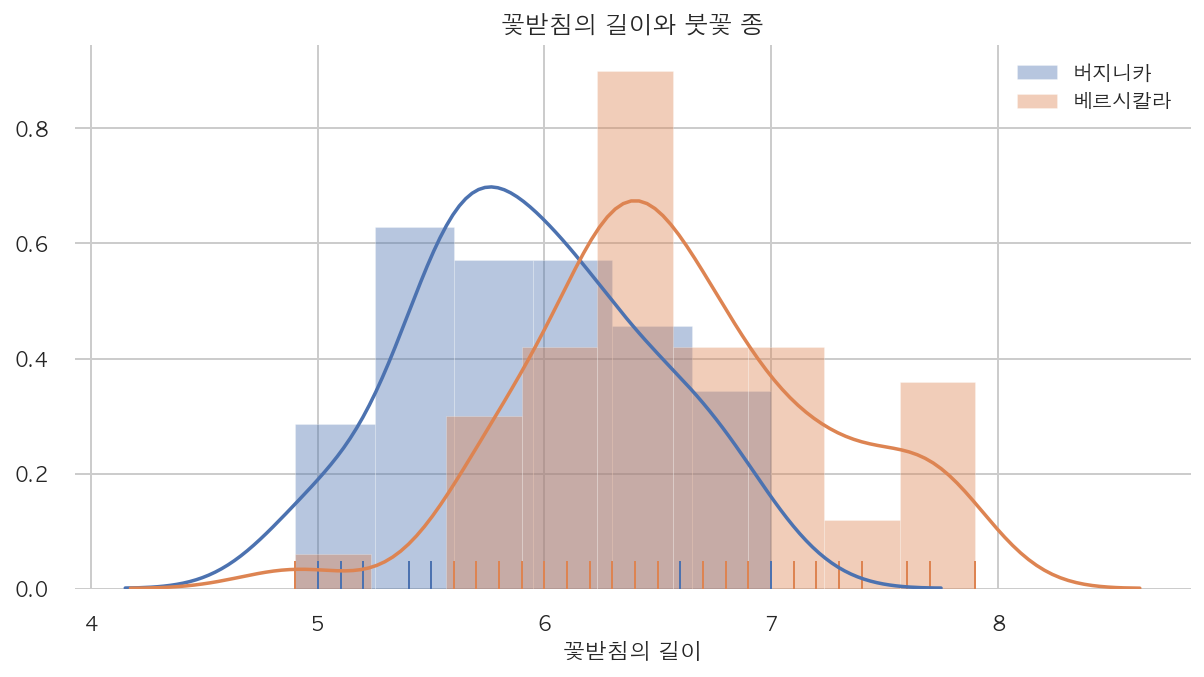

In [47]:
sns.distplot(df[df.species == 1]['sepal length (cm)'],
             hist=True, rug=True, label='버지니카')
sns.distplot(df[df.species == 2]['sepal length (cm)'],
             hist=True, rug=True, label='베르시칼라')
plt.legend()
plt.xlabel('꽃받침의 길이')
plt.title('꽃받침의 길이와 붓꽃 종')
plt.show()

In [51]:
df['X1'] = df['sepal length (cm)'] > 6
pivot_table1 = df.groupby(['X1', 'species']).size().unstack().fillna(0)
pivot_table1

species,1,2
X1,,
False,30,9
True,20,41


In [53]:
def cond_entropy(v):
    eps = np.finfo('float').eps
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX


cond_entropy(pivot_table1.values)

0.860714271586387

In [54]:
df['X2'] = df['sepal length (cm)'] > 6.5
pivot_table2 = df.groupby(['X2', 'species']).size().unstack().fillna(0)
pivot_table2

species,1,2
X2,,
False,42,28
True,8,22


In [55]:
cond_entropy(pivot_table2.values)

0.9306576387006182

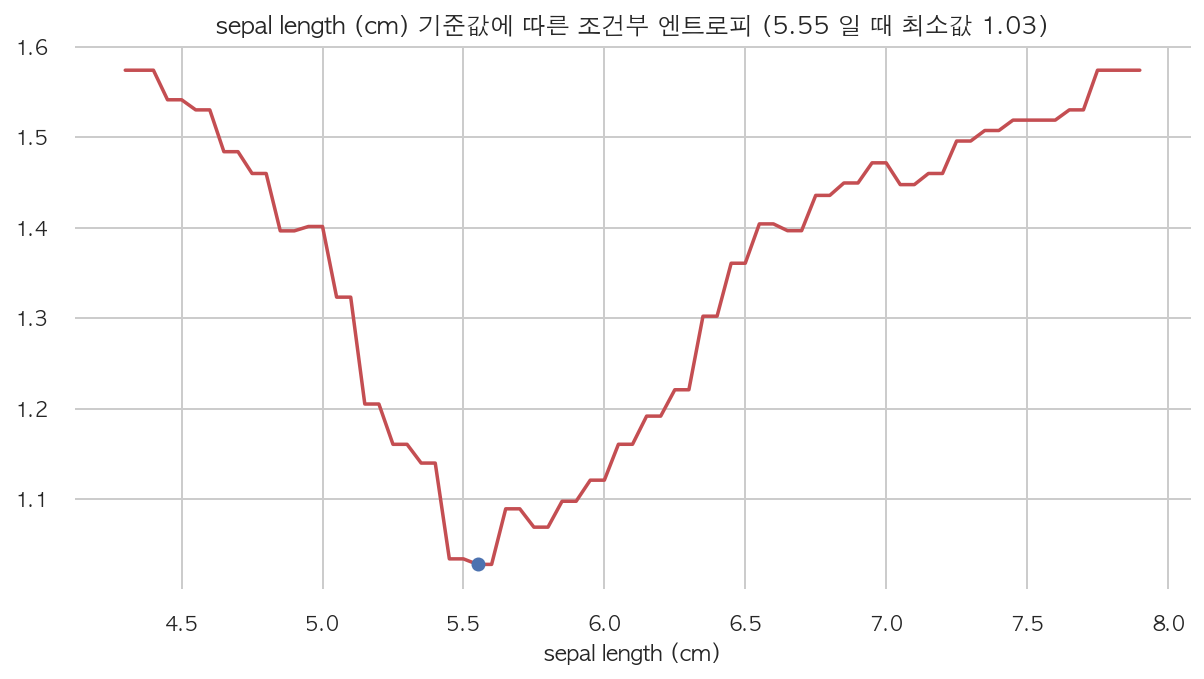

In [58]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target


def calc_cond_entropies(col, threshold):
    df['X1'] = df[col] > threshold
    pivot_table1 = \
        df.groupby(['X1', 'species']).size().unstack().fillna(0)
    v = pivot_table1.values
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    return HYX


def plot_min_cond_entropy(col):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max+0.05, 0.05)

    cond_entropies = []
    for th in th_range:
        cond_entropies.append(calc_cond_entropies(col, th))

    id_min = np.argmin(cond_entropies)
    th_min = th_range[id_min]
    ce_min = np.min(cond_entropies)
    plt.plot(th_range, cond_entropies, 'r-')
    plt.plot(th_min, ce_min, 'bo')
    title = '{} 기준값에 따른 조건부 엔트로피 ({:.3} 일 때 최소값 {:.3})'.format(
        col, th_min, ce_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()


plot_min_cond_entropy('sepal length (cm)')

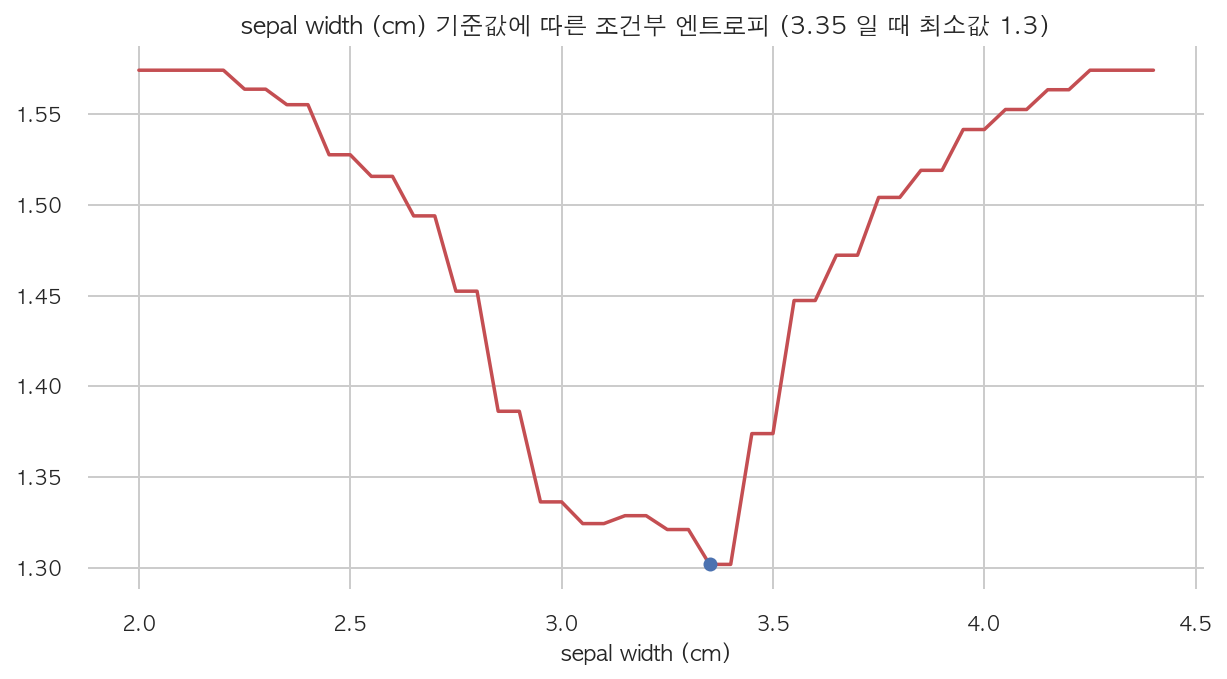

In [59]:
plot_min_cond_entropy('sepal width (cm)')